We will use those libraries in this tutorial:

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

In [44]:
df_train=pd.read_csv('data/train.csv',header=0,index_col=0,parse_dates=['date'])
df_oil = pd.read_csv('data/oil.csv',header=0,parse_dates=['date'])
df_stores = pd.read_csv('data/stores.csv',header=0,index_col=0)
df_transactions = pd.read_csv('data/transactions.csv',header=0,parse_dates=['date'])
df_holidays = pd.read_csv('data/holidays_events.csv',header=0,parse_dates=['date'])

In [45]:
df_train.tail(10)

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000878,2017-08-15,9,MAGAZINES,11.000,0
3000879,2017-08-15,9,MEATS,449.228,0
3000880,2017-08-15,9,PERSONAL CARE,522.000,11
3000881,2017-08-15,9,PET SUPPLIES,6.000,0
3000882,2017-08-15,9,PLAYERS AND ELECTRONICS,6.000,0
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [46]:
df_oil.head(10)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


As you can see, we have 43 missing values in oil dataset.

In [47]:
df_oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [48]:
df_oil.iloc[0,1]=df_oil.iloc[1,1]
df_oil.fillna(method='ffill', inplace=True)
df_oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

Now, let's merge all the dataframes.

In [49]:
df_train = df_train.merge(df_oil, on='date', how='left')
df_train = df_train.merge(df_stores, on='store_nbr', how='left')
df_train = df_train.merge(df_transactions, on=['date','store_nbr'], how='left')
df_train = df_train.merge(df_holidays, on='date', how='left')

In [50]:
df_train

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.000,0,93.14,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Quito,Pichincha,B,6,2155.0,Holiday,Local,Riobamba,Fundacion de Riobamba,False


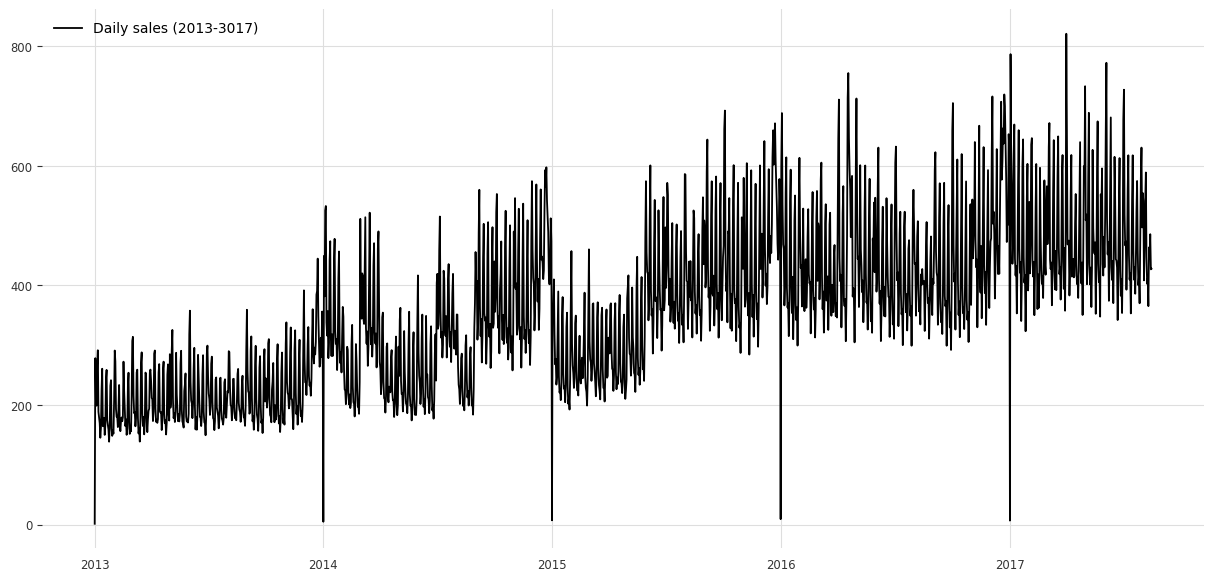

In [51]:
df_plot=df_train[["date","sales"]].groupby(by='date',as_index=False).mean()
pyplot.plot(df_plot['date'],df_plot['sales'],label='Daily sales (2013-3017)')
pyplot.legend()
pyplot.show()

Text(0, 0.5, 'Daily sales')

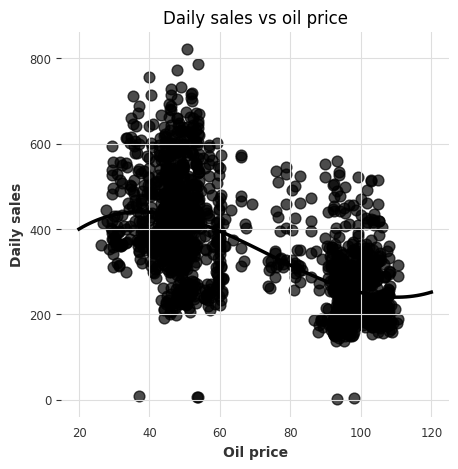

In [52]:
df_plot = df_train[["date","dcoilwtico","sales"]].groupby(by='date').mean()
df_plot.fillna(method='ffill',inplace=True)


# Initialize layout
fig, ax = pyplot.subplots(figsize = (5, 5))

# Add scatterplot
ax.scatter(df_plot['dcoilwtico'], df_plot['sales'], label='Daily sales vs oil price',
           s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
b3, b2, b1, a = np.polyfit(df_plot['dcoilwtico'], df_plot['sales'], deg=3)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(20, 120, num=100)

# Plot regression line
ax.plot(xseq, a + b1 * xseq + b2 * xseq * xseq + b3 * xseq * xseq * xseq, color="k", lw=2.5)
ax.title.set_text('Daily sales vs oil price')
ax.set_xlabel('Oil price')
ax.set_ylabel('Daily sales')

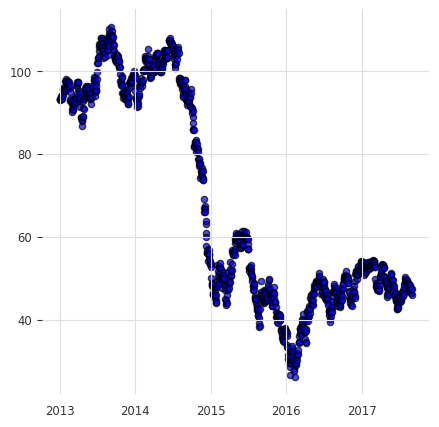

In [53]:
df_oil.tail(10)
fig, ax = pyplot.subplots(figsize= (5, 5))
ax.scatter(df_oil.date,df_oil.dcoilwtico,s=20,alpha=0.7,edgecolors="k",color='blue')

#### Influence of promotions

Text(0, 0.5, 'Daily sales')

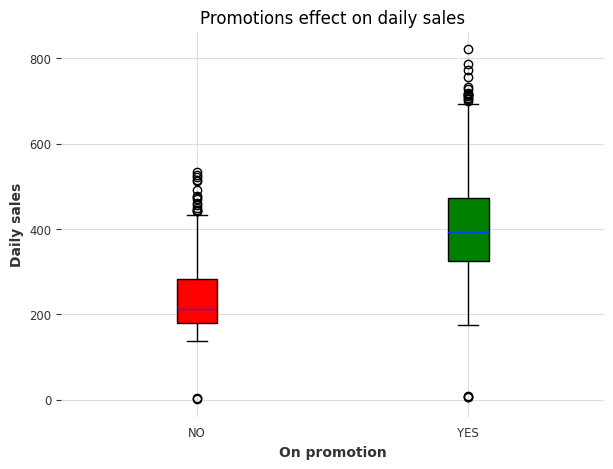

In [54]:
df_plot=df_train[["date","sales","onpromotion"]].groupby(by='date').mean()
data_1=df_plot[df_plot.onpromotion == 0]['sales']
data_2=df_plot[df_plot.onpromotion > 0]['sales']

fig, ax = pyplot.subplots(figsize=(7, 5))
dataset = [data_1, data_2]
labels = ['NO','YES']
colors = ['red','green']
bplot = ax.boxplot(dataset, labels = labels, patch_artist = True)
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title("Promotions effect on daily sales")
ax.set_xlabel("On promotion")
ax.set_ylabel("Daily sales")

#### Influence of national holidays on the average daily sales

Text(0, 0.5, 'Daily sales')

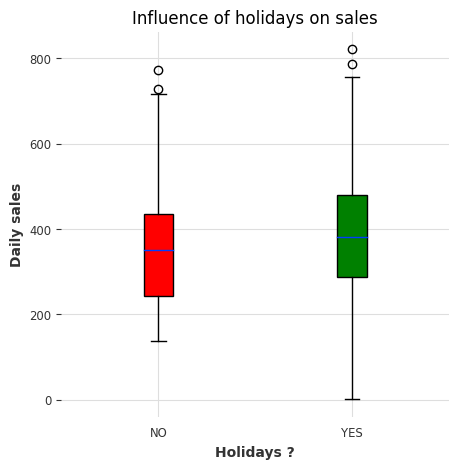

In [55]:
df_plot=df_train.merge(df_holidays,on='date',how='left')
data_1=df_plot[df_plot.type.isnull()][['date','sales']].groupby(by='date').mean()['sales']
data_2=df_plot[df_plot.type.notnull()][['date','sales']].groupby(by='date').mean()['sales']

fig, ax= pyplot.subplots(figsize=(5,5))
dataset=[data_1,data_2]
labels=['NO','YES']
colors=['red','green']
bplot=ax.boxplot(dataset,labels=labels,patch_artist=True)
for patch, color in zip(bplot['boxes'],colors):
    patch.set_facecolor(color)
ax.title.set_text('Influence of holidays on sales')
ax.set_xlabel("Holidays ?")
ax.set_ylabel("Daily sales")

In [57]:
import datetime
data_complet = df_train[(df_train.family=='BEVERAGES') & (df_train.store_nbr==51)][['date','sales']]
data_complet = data_complet[data_complet.duplicated('sales')==False]
data_complet = data_complet.set_index('date',drop=True)
print(data_complet.tail(10))

             sales
date              
2017-08-04  4522.0
2017-08-05  6134.0
2017-08-07  3779.0
2017-08-08  3269.0
2017-08-09  4267.0
2017-08-11  5356.0
2017-08-12  4137.0
2017-08-13  5529.0
2017-08-14  3888.0
2017-08-15  3860.0


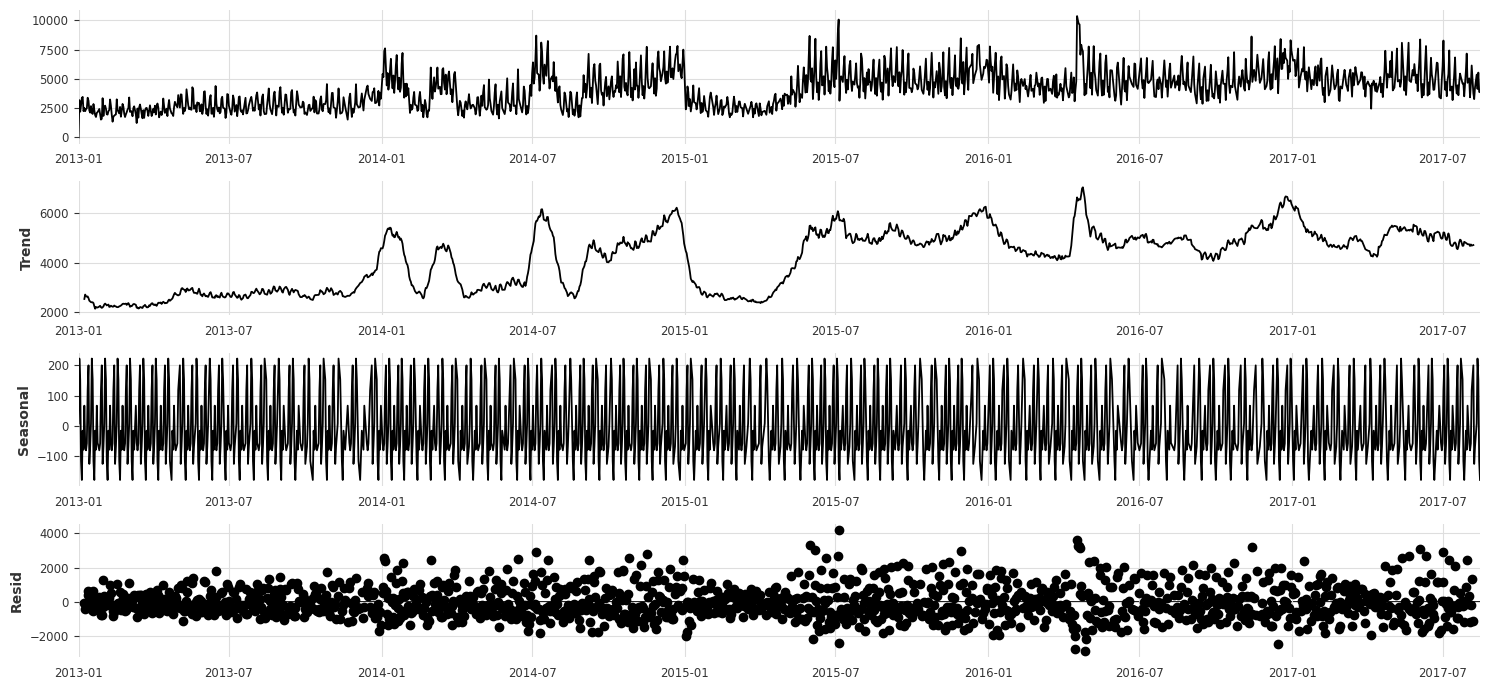

In [58]:
#from plotly.plotly import plot_mpl
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=data_complet,
                            model='additive',
                            period=15)
fig = result.plot()
plt.rcParams['figure.figsize'] = [15,7]

In [59]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(15).mean()
    rolstd = timeseries.rolling(15).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Stationarity test

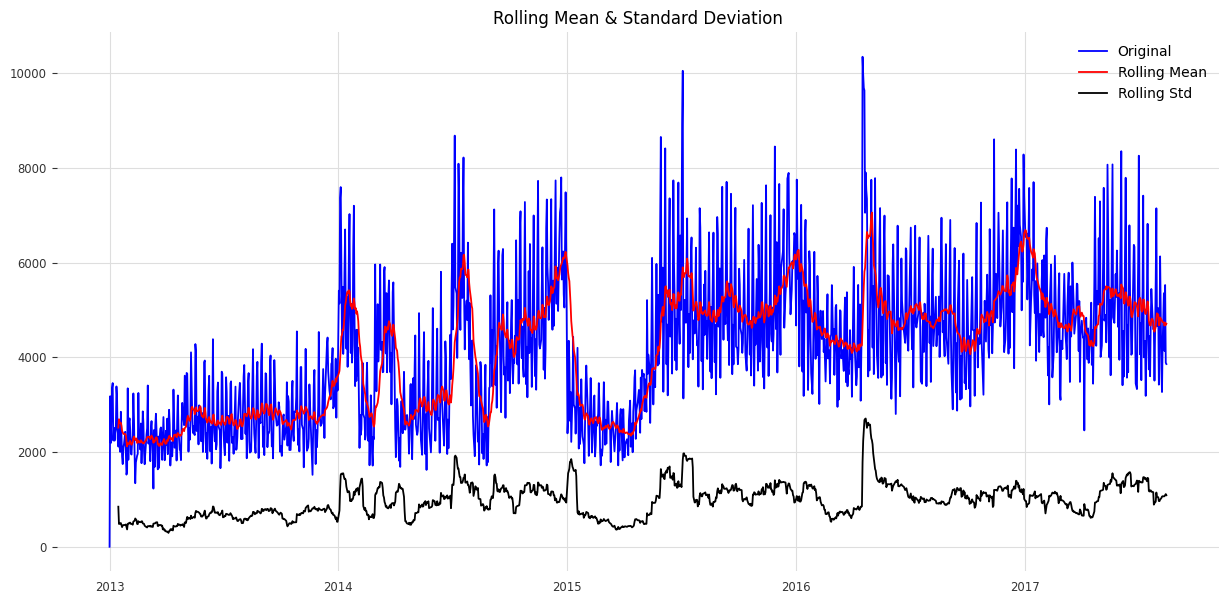

Results of Dickey-Fuller Test:
Test Statistic                   -3.856896
p-value                           0.002376
#Lags Used                       18.000000
Number of Observations Used    1426.000000
Critical Value (1%)              -3.434944
Critical Value (5%)              -2.863569
Critical Value (10%)             -2.567850
dtype: float64


In [60]:
test_stationarity(data_complet)

Test statistic is smaller than all critical values (1%, 5% and 10%), and p-value is smaller than 5% (if we take 95% as confidence level). Null hypothesis can be rejected, we can conclude that our data is stationary (it has some time dependent component).
We can go to the next level which is time series prediction.

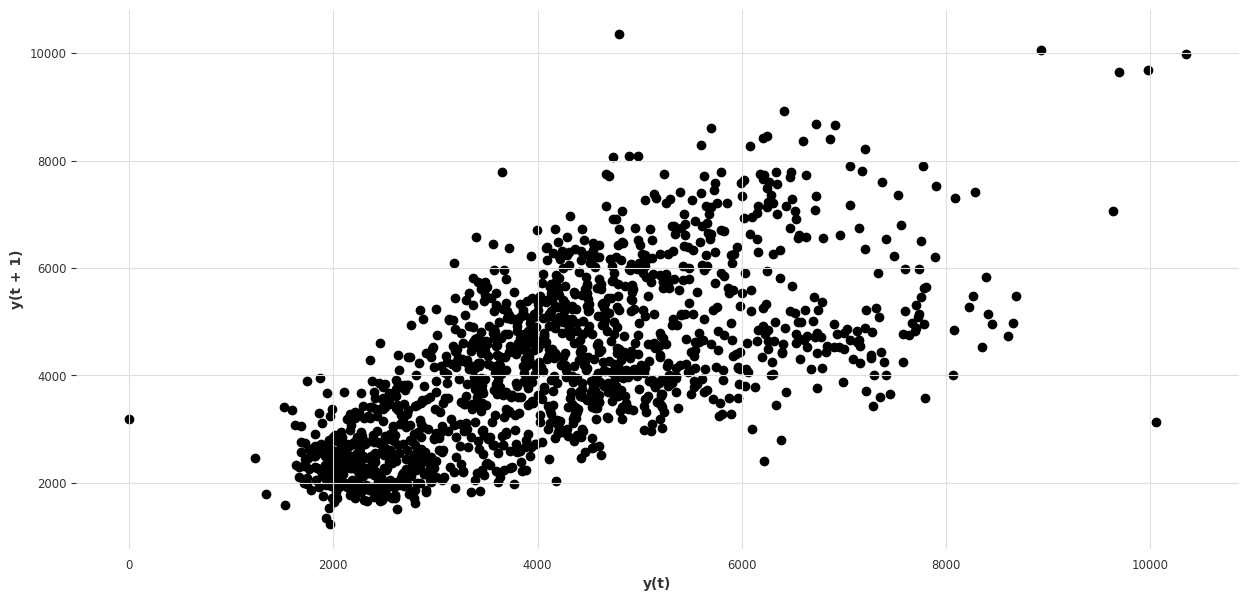

In [61]:
#Correlation between (n) value and (n+1) value
from pandas.plotting import lag_plot
lag_plot(data_complet)
plt.show()

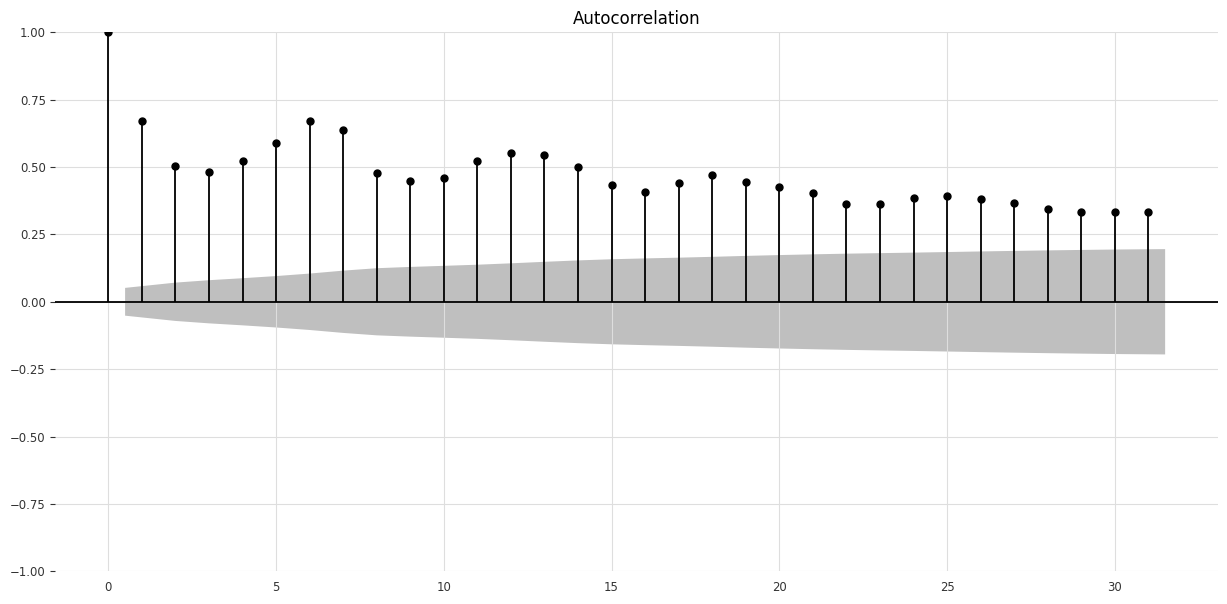

In [62]:
#Correlation coef. by lag (lag1 -> n-1, lag2 ->n-2)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_complet, lags=31)
plt.show()

### Autoregression model
with lags=31

Test RMSE: 1259.580


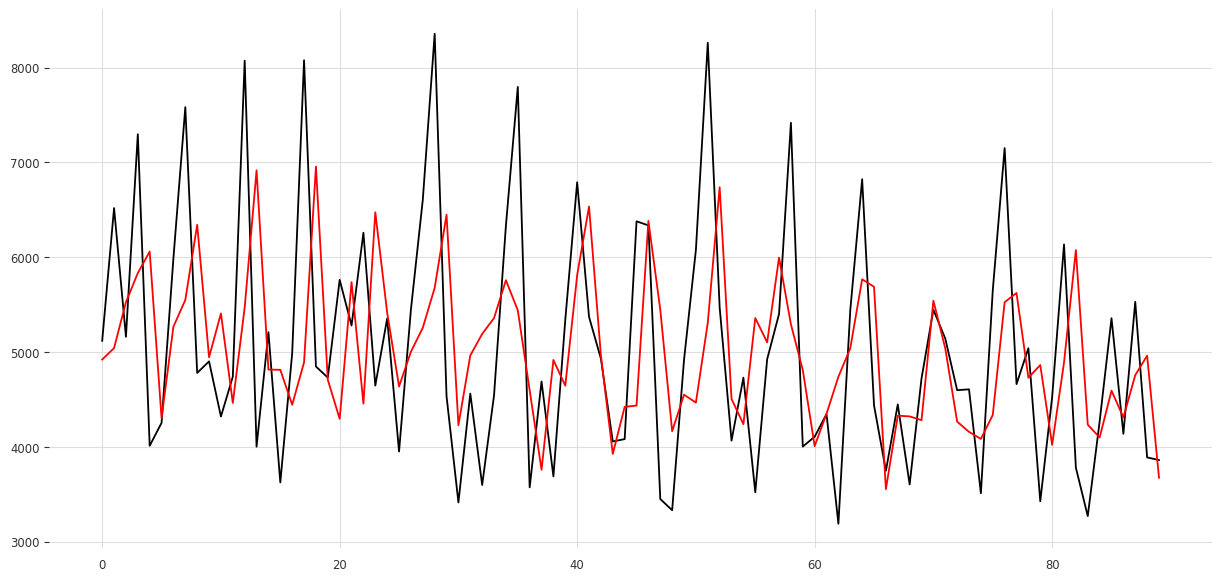

In [63]:
#Autoregression (linear regression)
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

#Last 3 months for validation
X=pd.DataFrame(data_complet.sales)
train, validation = X[0:len(X)-90], X[len(X)-90:]
train.reset_index(drop=True)
validation.reset_index(drop=True, inplace=True)


window=31
model=AutoReg(train,lags=31)
model_fit=model.fit()
coef= model_fit.params
history = train[len(train)-window:]
history = [history.iloc[i] for i in range(len(history))]

predictions=list()
for t in range(len(validation)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = validation.iloc[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(validation, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(validation)
pyplot.plot(predictions, color='red')
pyplot.show()


In [76]:
#Split data into train and validation dataset
data_complet = df_train[(df_train.family=='BEVERAGES') & 
              (df_train.store_nbr==51)][['date','sales']]
data_complet=data_complet[data_complet.duplicated('date')==False]
data_complet['datetime'] = pd.to_datetime(data_complet['date'])
data_complet = data_complet.set_index('datetime')
data_complet.drop(['date'], axis=1, inplace=True)
train, validation = data_complet[1:len(data_complet)-90], data_complet[len(data_complet)-90:]
train.tail(10)

,sales
datetime,
2017-05-08,4779.0
2017-05-09,3867.0
2017-05-10,4901.0
2017-05-11,4319.0
2017-05-12,4739.0
2017-05-13,8072.0
2017-05-14,5831.0
2017-05-15,5539.0
2017-05-16,4001.0


## ARIMA model

Test RMSE: 1206.734


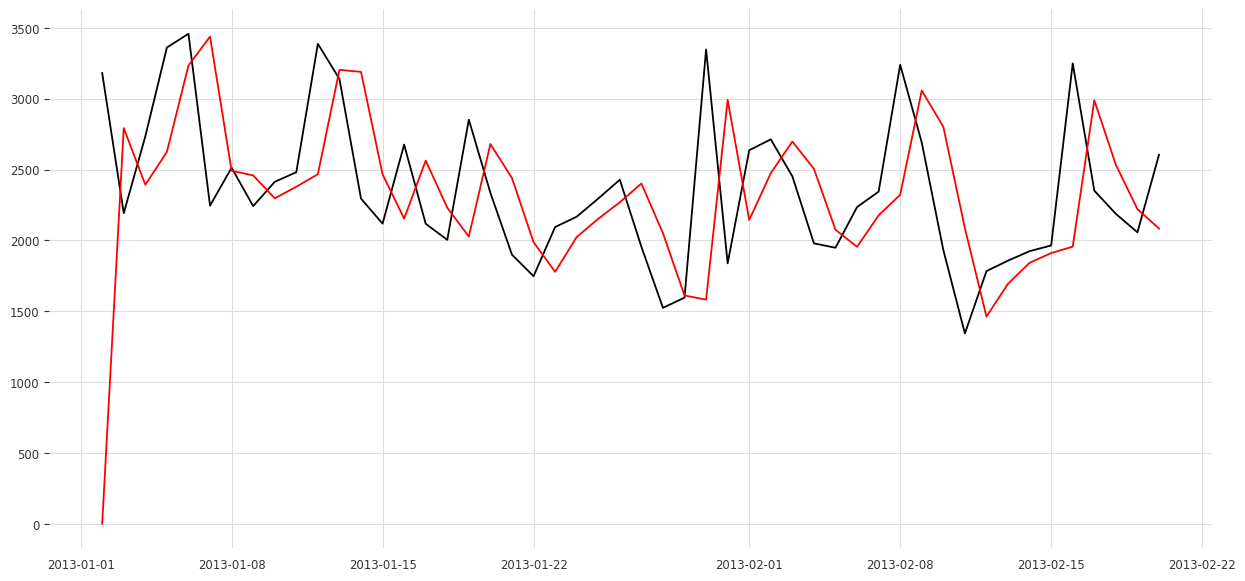

In [77]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(1,1,0))
arima_results = arima_model.fit()
plt.plot(train[:50])
plt.plot(arima_results.fittedvalues[:50], color='red')
rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1003.575


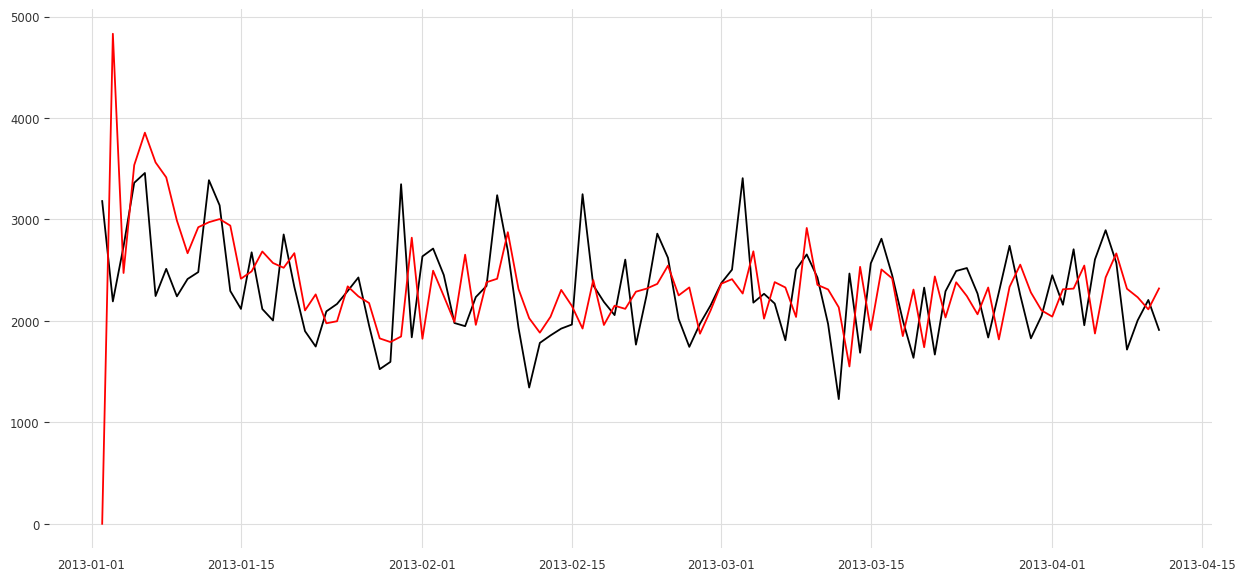

In [78]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train,order=(5,2,1))
arima_results = arima_model.fit()
plt.plot(train[:100])
plt.plot(arima_results.fittedvalues[:100], color='red')
rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
print('Test RMSE: %.3f' % rmse)

## Auto-Arima

In [79]:
import pmdarima as pm
auto_arima_model= pm.auto_arima(y=train)
print(auto_arima_model.summary())
#plt.plot(train[:100])
#plt.plot(arima_results.fittedvalues[:100], color='red')
#rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
#print('Test RMSE: %.3f' % rmse)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1593
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -13059.718
Date:                Fri, 30 Sep 2022   AIC                          26135.435
Time:                        09:36:47   BIC                          26178.417
Sample:                             0   HQIC                         26151.400
                               - 1593                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4662      0.021     22.354      0.000       0.425       0.507
ar.L2         -0.7407      0.022    -33.200      0.000      -0.784      -0.697
ar.L3         -0.1878      0.023     -8.184      0.0

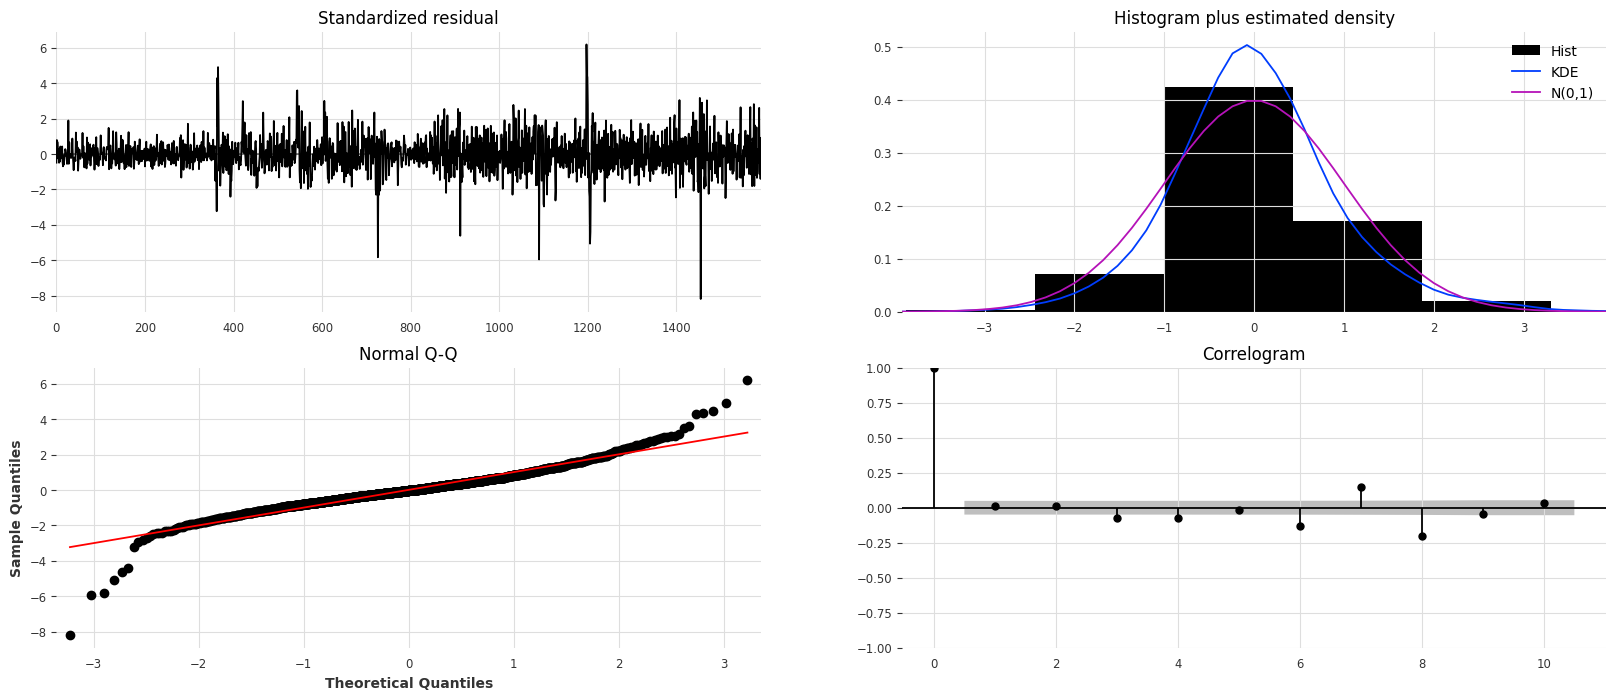

In [80]:
auto_arima_model.plot_diagnostics(figsize=(20,8))
plt.show()

In [103]:
arima_model = ARIMA(train,order=(5,1,2))
arima_results = arima_model.fit()
plt.plot(train[:200])
plt.plot(arima_results.fittedvalues[:200], color='red')
rmse = sqrt(mean_squared_error(train, arima_results.fittedvalues))
print('Test RMSE: %.3f' % rmse)

ValueError: unrecognized data structures: <class 'darts.timeseries.TimeSeries'> / <class 'NoneType'>

### Naive Seasonal

MAPE of naive seasonal model: 19.17


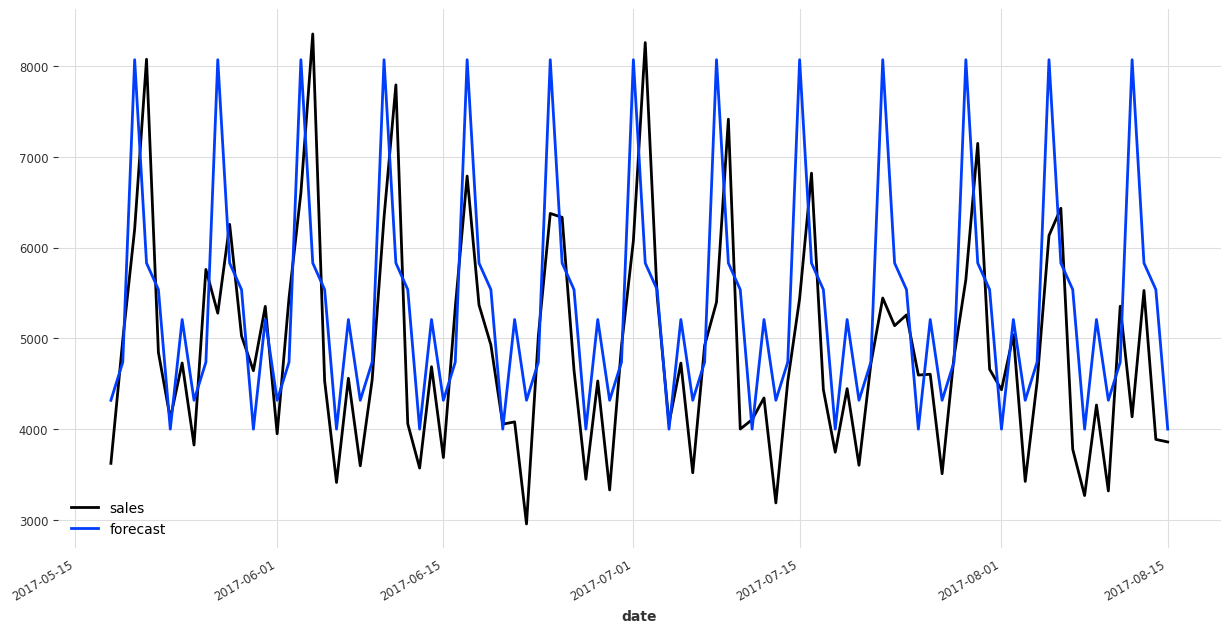

In [204]:
import numpy
from darts.models import NaiveSeasonal
from darts import TimeSeries
from darts.metrics import mape

data_complet = df_train[(df_train.family=='BEVERAGES') & 
              (df_train.store_nbr==51)][['date','sales']]
data_complet=data_complet[data_complet.duplicated('date')==False]

series = TimeSeries.from_dataframe(data_complet, 'date', 'sales',fill_missing_dates=True)
train, val = series[:-90], series[-90:]
naiveSeasonal_model= NaiveSeasonal(K=7)
naiveSeasonal_model.fit(train)
prediction = naiveSeasonal_model.predict(90)


series[-90:].plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()
print("MAPE of naive seasonal model: %.2f" % mape(series[-90:],prediction))

### ExponentialSmoothing

### Prophet

Mape of Prohet model: 19.03


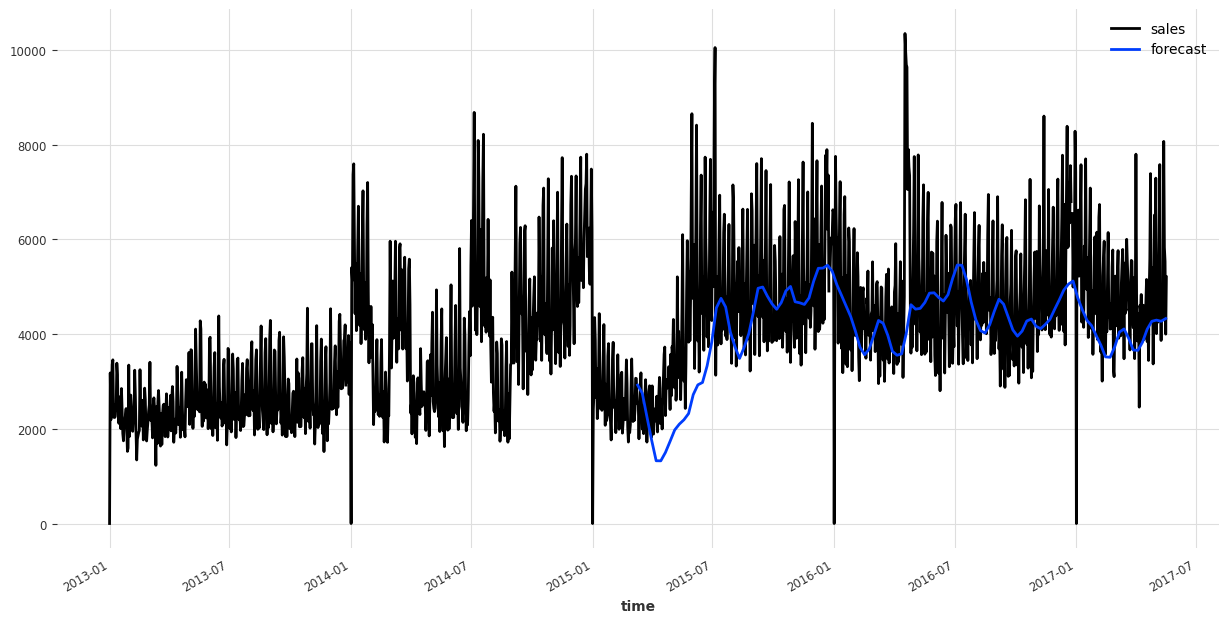

In [210]:
from darts.models import Prophet

prophet_model=Prophet()
prophet_model.fit(train)
prediction = prophet_model.historical_forecasts(train, start=0.5,stride=7)
#pred=prediction.to_dataframe()
#pred=pd.concat([prediction[i].to_pandas() for i in range(90)])
#print(prediction)
print("Mape of Prohet model: %.2f" % mape(series[:-90],prediction))
series[:-90].plot()
prediction.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [42]:
#import darts.timeseries as tm
#tm.TimeSeries(train)
#concatenate(train)
df = df_train[(df_train.family=='BEVERAGES') & 
              (df_train.store_nbr==51)][['date','sales']]
df=df[df.duplicated('date')==False]
df['datetime'] = pd.to_datetime(df['date'])
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head(5)

,sales
datetime,
2013-01-01,0.0
2013-01-02,3181.0
2013-01-03,2192.0
2013-01-04,2734.0
2013-01-05,3361.0


### TBARTS

,sales
datetime,
2013-01-02,3181.0
2013-01-03,2192.0
2013-01-04,2734.0
2013-01-05,3361.0
2013-01-06,3458.0
...,...
2017-05-13,8072.0
2017-05-14,5831.0
2017-05-15,5539.0
